In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
raw_df = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\resources\65262-110-values.csv')

In [112]:
raw_df = raw_df.sort_values(by=['timestamp'])

In [113]:
raw_df.dropna(inplace=True)

In [114]:
raw_df.head()

,timestamp,pgn,spn,decodedValue
101977877,0,0,897,0.0
102156864,0,0,3350,0.0
102156863,0,0,3349,0.0
102156862,0,0,898,0.0
102156861,0,0,897,0.0


In [115]:
#df_copy.drop("timestamp", axis=1, inplace=True)

In [116]:
#df_copy.value_counts("pgn")

In [117]:
#counts = df_copy["pgn"].value_counts()


In [118]:
#df_copy.groupby(["pgn", "spn"]).value_counts()

### Creating a dataset with relevant PGNs

In [119]:
values = [61443, 61444, 61441, 65247, 65266, 61450, 65248, 65215, 65263, 65213, 64817, 65253, 64777, 65262]

In [120]:
df_new = raw_df[raw_df['pgn'].isin(values)]

In [121]:
df_new.to_csv('relevant_data.csv')

In [122]:
df = pd.read_csv('relevant_data.csv')

In [123]:
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)

In [124]:
df_copy = df.copy()

In [125]:
df_copy = df_copy.sort_values(by=['timestamp'])

In [126]:
df = df.sort_values(by=['timestamp'])

In [160]:
df_copy.loc[(df_copy['sensor']=='65215-906'), 'decodedValue'].value_counts()

Series([], Name: decodedValue, dtype: int64)

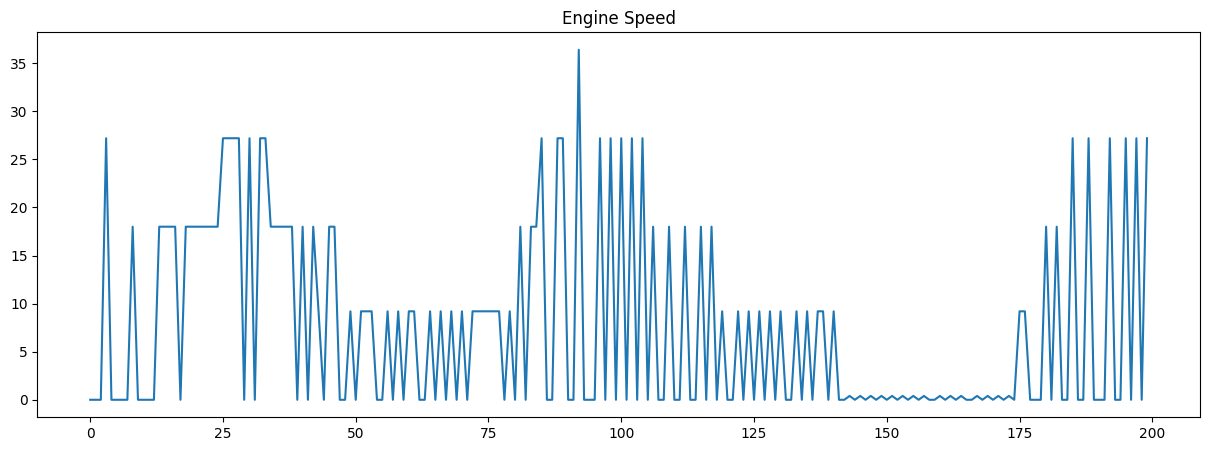

In [162]:
vals = df_copy.loc[(df_copy['sensor']=='65213-975'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65213-975'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(range(0, 200, 1), vals[:200])
plt.title('Engine Speed')
plt.show()

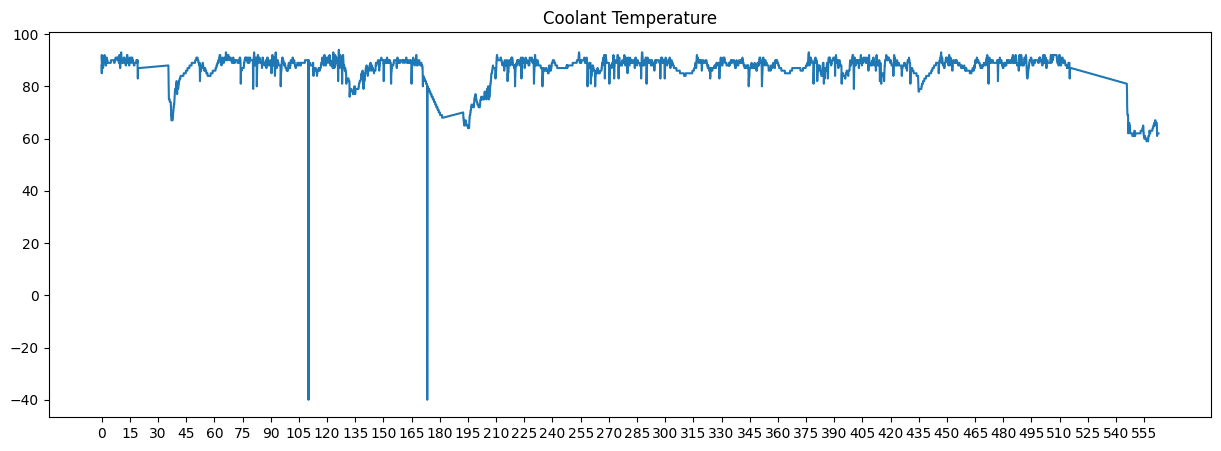

In [147]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110'), 'timestamp']
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals)
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 15.0))
plt.title('Coolant Temperature')
plt.show()

In [130]:
cdf = df.copy()

In [131]:
df.head(10)

,Unnamed: 0,timestamp,pgn,spn,decodedValue,sensor
0,47618823,0,61443,2979,0.000,61443-2979
206,54080502,0,61444,4154,0.375,61444-4154
205,54080501,0,61444,899,5.000,61444-899
204,54080500,0,61444,513,5.000,61444-513
203,54080499,0,61444,2432,6.000,61444-2432
202,54080498,0,61444,512,6.000,61444-512
201,65864084,0,61444,190,0.000,61444-190
200,65864083,0,61444,513,0.000,61444-513
199,65864082,0,61444,512,0.000,61444-512
198,70076208,0,65247,514,5.000,65247-514


In [132]:
df.drop(['Unnamed: 0', 'timestamp'], axis=1, inplace=True)

In [133]:
df.head(10)

,pgn,spn,decodedValue,sensor
0,61443,2979,0.000,61443-2979
206,61444,4154,0.375,61444-4154
205,61444,899,5.000,61444-899
204,61444,513,5.000,61444-513
203,61444,2432,6.000,61444-2432
202,61444,512,6.000,61444-512
201,61444,190,0.000,61444-190
200,61444,513,0.000,61444-513
199,61444,512,0.000,61444-512
198,65247,514,5.000,65247-514


Looking at only the engine cooling system

In [163]:
#sensors = ['61441-521', '61441-973', '61443-91', '61443-92', '61443-974', '61443-29', '61443-3357', '61443-5398', '61444-4154', '61444-512', '61444-513', '61444-190', '61444-2432', '61450-2659', '61450-132', '61450-5257', '64817-1550', '64817-1598', '65213-975', '65213-1639', '65247-514', '65247-515', '65247-2978', '65262-110', '65262-174', '65262-175', '65262-176', '65262-52', '65263-94', '65263-22', '65263-98', '65263-100', '65263-101', '65263-109', '65263-111', '65266-183', '65266-184', '65266-185', '65266-51', '65266-3673']
coolsys = ['64817-1598', '65262-110', '65263-111']

Creating a sub dataframe using only the cooling system

In [164]:
df = df[df['sensor'].isin(coolsys)]

In [165]:
df.shape

(92562, 4)

In [166]:
df.head()

,pgn,spn,decodedValue,sensor
1090,64817,1598,4096.0,64817-1598
1259,65263,111,50.0,65263-111
2167,65262,110,88.0,65262-110
3729,65262,110,89.0,65262-110
4118,65263,111,50.0,65263-111


In [169]:
lsofdicts = []
for index,rows in df.iterrows():
    x = rows[3]
    y = rows[2]
    z = {x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [170]:
#pd.concat([new_df, z], ignore_index=True)

In [171]:
this_df.head()

,64817-1598,65263-111,65262-110
0,4096.0,NaN,NaN
1,NaN,50.0,NaN
2,NaN,NaN,88.0
3,NaN,NaN,89.0
4,NaN,50.0,NaN


In [172]:
this_df.fillna(method='ffill', inplace=True)
this_df.dropna(inplace=True)
this_df.head(10)

,64817-1598,65263-111,65262-110
2,4096.0,50.0,88.0
3,4096.0,50.0,89.0
4,4096.0,50.0,89.0
5,4096.0,50.0,87.0
6,4096.0,50.0,87.0
7,4096.0,50.0,87.0
8,4096.0,50.0,87.0
9,4096.0,50.0,87.0
10,4096.0,50.0,89.0
11,4096.0,50.0,90.0


<Axes: >

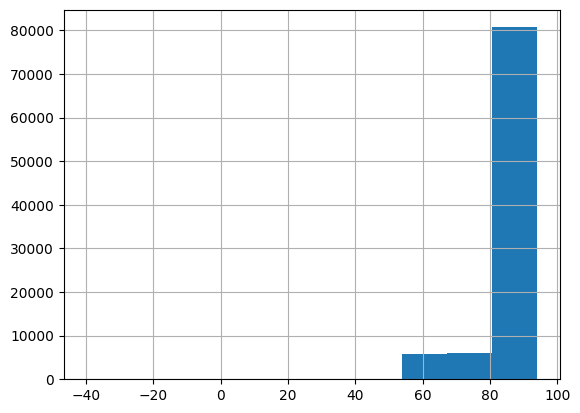

In [173]:
this_df['65262-110'].hist()

<Axes: >

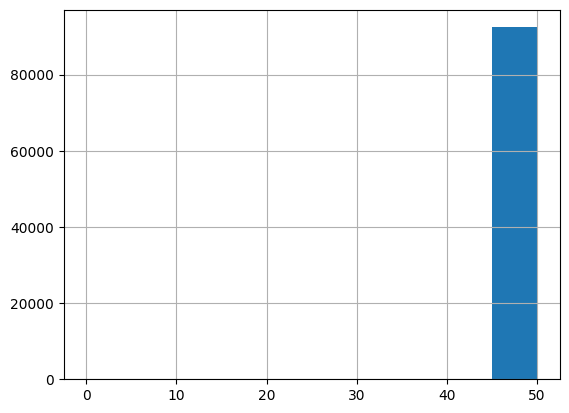

In [174]:
this_df['65263-111'].hist()

In [175]:
this_df.shape

(92560, 3)

In [176]:
this_df.to_csv('cooling_system.csv')

In [177]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [178]:
this_df.loc[(this_df['64817-1598']==0), '65262-110'].value_counts().sum() #Checking for how many values was the fan turned off

50

In [179]:
this_df.loc[(this_df['65262-110']<=90.0), '65262-110'].value_counts().sum()

84482

In [180]:
'''                                         #timestamps dictate that the fan turns off for around 2 seconds
counter = 0
couunt = 0
for index, row in this_df.iterrows():
    try:
        prevr = this_df.loc[index-4]
        next = this_df.loc[index+4]
    except:
        print("Bleh")
    if(row[3] == 90.0 and prevr[3] > 90.0):
        counter += 1
    if(row[1]==0):
        print(row[0]/60000)
        
print(counter)
print(couunt)
'''

'                                         #timestamps dictate that the fan turns off for around 2 seconds\ncounter = 0\ncouunt = 0\nfor index, row in this_df.iterrows():\n    try:\n        prevr = this_df.loc[index-4]\n        next = this_df.loc[index+4]\n    except:\n        print("Bleh")\n    if(row[3] == 90.0 and prevr[3] > 90.0):\n        counter += 1\n    if(row[1]==0):\n        print(row[0]/60000)\n        \nprint(counter)\nprint(couunt)\n'

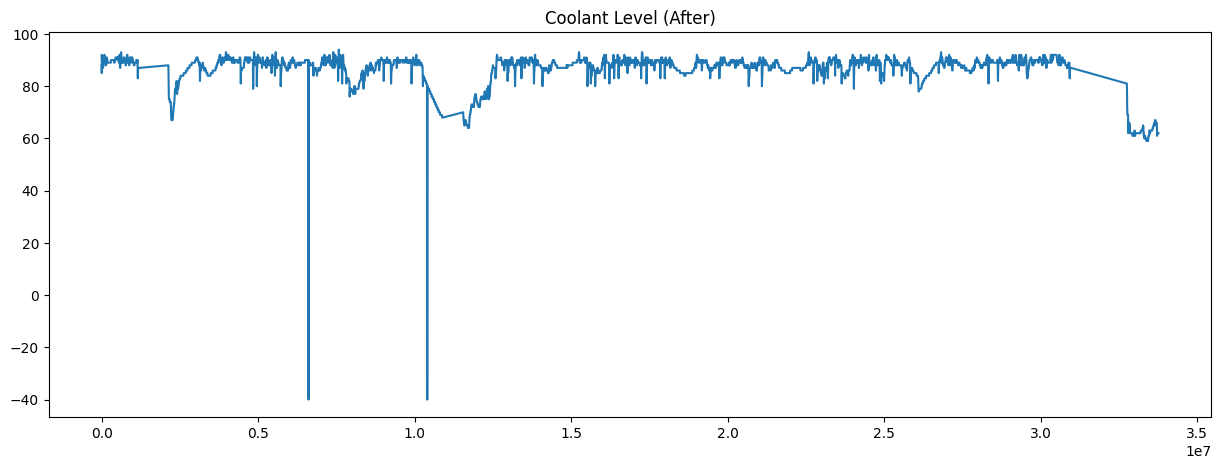

In [181]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110'), 'timestamp']
#ts/=60
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


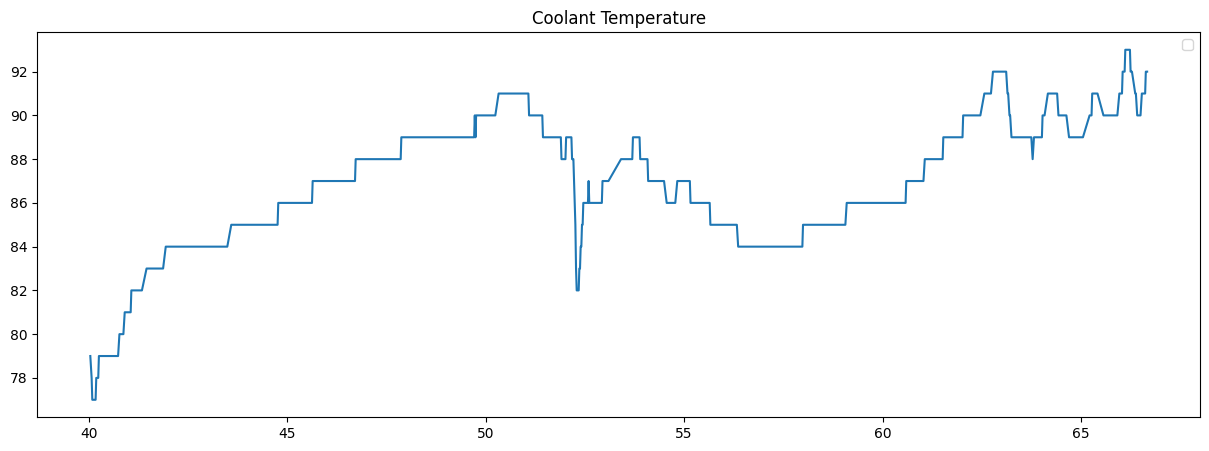

In [182]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 2400000) & (df_copy['timestamp'] < 4000000), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 2400000) & (df_copy['timestamp'] < 4000000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Temperature')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


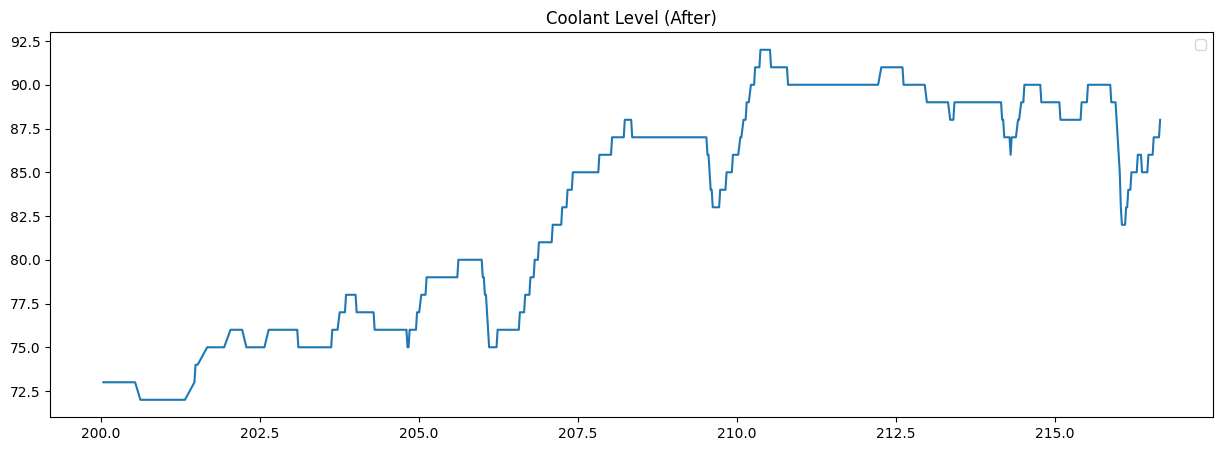

In [184]:
vals = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 12000000) & (df_copy['timestamp'] < 13000000), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65262-110') & (df_copy['timestamp'] > 12000000) & (df_copy['timestamp'] < 13000000), 'timestamp']
ts /= 60000
plt.figure(figsize=(15,5))
plt.plot(ts, vals)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()